In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

from sklearn.model_selection import KFold
from sklearn import svm, tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

In [1]:
import pandas as pd

In [2]:
titanic_df= pd.read_csv('train.csv')

In [3]:
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
titanic_df.shape

(891, 12)

In [5]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# DataFrame[원하는 column명].value_counts(): 값의 종류별로 도수를 보여준다
# 0은 사망자, 1은 생존자
titanic_df['Survived'].value_counts() 

0    549
1    342
Name: Survived, dtype: int64

## **데이터 시각화**

<AxesSubplot:ylabel='Survived'>

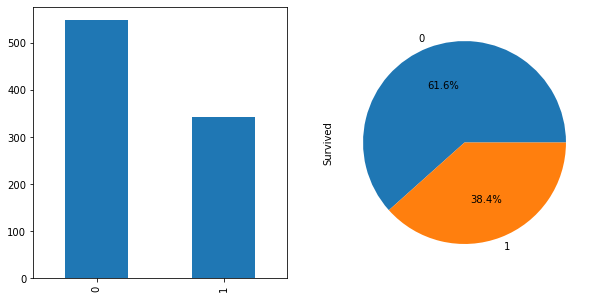

In [4]:
# plt.figure(figsize=(10,5)): 가로 10, 세로 5inch의 백지 생성
plt.figure(figsize=(10,5))
plt.subplot(1,2,1) # 백지를 1행 2열 공간으로 나누고 첫번째 자리에 그래프에 그려준다

titanic_df['Survived'].value_counts().plot(kind='bar') # 막대(bar)그래프

plt.subplot(1,2,2) # 1행 2열로 나뉜 백지의 두번째 자리에 그래프 그려준다

titanic_df["Survived"].value_counts().plot(kind = "pie", autopct='%1.1f%%') # 파이(pie)그래프

<AxesSubplot:xlabel='Sex', ylabel='count'>

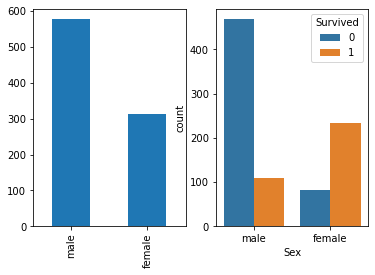

In [5]:
plt.subplot(1,2,1)

# 성별 분포에 대한 막대그래프
titanic_df["Sex"].value_counts().plot(kind = "bar")

plt.subplot(1,2,2)

# 성별에 따른 생존자, 사망자 분포
sns.countplot(data=titanic_df, x="Sex", hue="Survived") 

<AxesSubplot:>

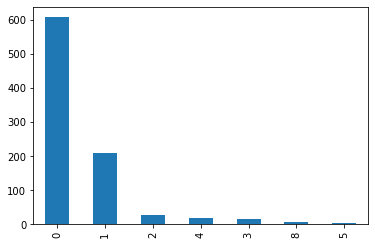

In [6]:
titanic_df["SibSp"].value_counts().plot(kind = "bar")

<AxesSubplot:xlabel='Embarked', ylabel='count'>

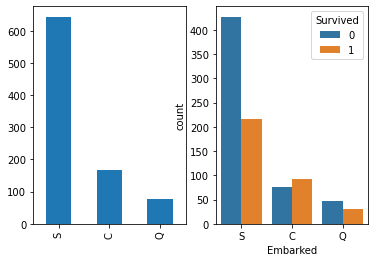

In [7]:
plt.subplot(1,2,1)
titanic_df["Embarked"].value_counts().plot(kind = "bar")
plt.subplot(1,2,2)
sns.countplot(data=titanic_df, x="Embarked", hue="Survived")

<AxesSubplot:>

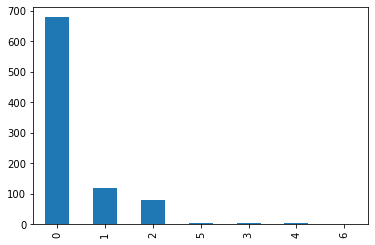

In [8]:
titanic_df["Parch"].value_counts().plot(kind = "bar")

## **결측치 확인**

In [7]:
titanic_df.isnull() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
titanic_df.isnull().sum()
# True(숫자 1), False(숫자 0)이므로
# 합계(sum)는 null data의 개수를 나타낸다

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### **Age 결측치 처리**

<AxesSubplot:ylabel='Frequency'>

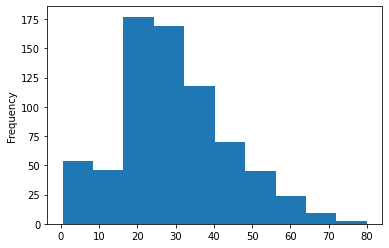

In [11]:
# 결측치 채우기 이전
titanic_df['Age'].plot(kind='hist')

In [12]:
# 결측치 채우기 전
# Age의 값이 null인 data만 조회
age_before = titanic_df[titanic_df['Age'].isnull()]
age_before.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


In [13]:
# mean_age: Age의 평균값
mean_age = titanic_df['Age'].mean()
print(mean_age)

29.69911764705882


In [14]:
# fillna(x): x로 null값을 채운다(fill)
titanic_df['Age'] = titanic_df['Age'].fillna(mean_age)

In [15]:
titanic_df[titanic_df.index.isin(age_before.index)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,29.699118,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,29.699118,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,29.699118,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,29.699118,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,29.699118,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,29.699118,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,29.699118,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,29.699118,0,0,349217,7.8958,NaN,S


In [16]:
# 결측치 채운 후
# Age의 값이 null이었던 data 조회
titanic_df[titanic_df['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


<AxesSubplot:ylabel='Frequency'>

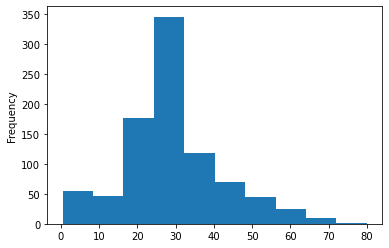

In [17]:
# 결측치 채운 후
titanic_df['Age'].plot(kind='hist')

### **Embarked 결측치 처리**

<AxesSubplot:>

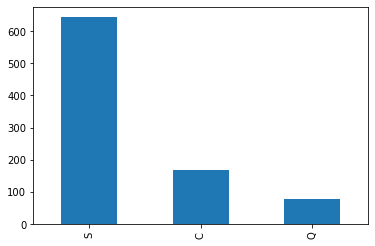

In [18]:
titanic_df["Embarked"].value_counts().plot(kind = "bar")

In [19]:
# 결측치 채우기 전
# Embarked의 값이 null인 data 조회
em_before = titanic_df[titanic_df['Embarked'].isnull()]
em_before.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [20]:
titanic_df[['Embarked']].mode()

,Embarked
0,S


In [21]:
# 최빈값('S')로 Embarked의 null값 대체
mode_em = titanic_df['Embarked'].mode
titanic_df['Embarked'] = titanic_df['Embarked'].fillna('S')

In [22]:
# 결측치 채운 후
# Embarked의 값이 null이었던 data 조회
titanic_df[titanic_df.index.isin(em_before.index)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,S


In [23]:
# FamilySize라는 새로운 변수 column 생성
# 형제, 배우자 수 + 부모, 자식 수 + 1(혼자일 경우 1로 표시)
titanic_df['FamilySize'] = (titanic_df['SibSp'] + titanic_df['Parch'] + 1)

## Feature Engineering - 명목변수 인코딩(One hot Encoding)

In [24]:
x1 = pd.get_dummies(titanic_df['Pclass']) #원핫인코딩 실시
x2 = pd.get_dummies(titanic_df['Embarked'])

data = pd.concat([titanic_df, x1, x2], axis=1)

In [25]:
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,1,2,3,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,1,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,0,1,0,0,1


In [26]:
data["Sex"].replace({"female" : 0, "male" : 1}, inplace = True)

In [27]:
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,1,2,3,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,2,1,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,0,1,0,0,1


## Feature Selection - 변수 선택 및 제외

In [28]:
# 예측에 유용하지 않다고 생각된다면 제외
drop_cols = ['PassengerId','Name',"Ticket",'Cabin','Survived','Pclass', 'Embarked']
x = data.drop(drop_cols, axis=1)
y = data['Survived']

In [29]:
x.head(3)

,Sex,Age,SibSp,Parch,Fare,FamilySize,1,2,3,C,Q,S
0,1,22.0,1,0,7.2500,2,0,0,1,0,0,1
1,0,38.0,1,0,71.2833,2,1,0,0,1,0,0
2,0,26.0,0,0,7.9250,1,0,0,1,0,0,1


In [30]:
y.head(3)

0    0
1    1
2    1
Name: Survived, dtype: int64

## Pandas to Numpy

In [31]:
X = x.to_numpy()

In [32]:
y = y.to_numpy()

## Train, Test data split - 학습, 테스트 데이터 분리

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print('X_train.shape:', X_train.shape)
print('y_train.shape:', y_train.shape)
print('X_test.shape:', X_test.shape)
print('y_test.shape:',y_test.shape)

X_train.shape: (623, 12)
y_train.shape: (623,)
X_test.shape: (268, 12)
y_test.shape: (268,)


## SVM

In [45]:
def train(X_train, X_test, y_train, y_test):
    model = svm.SVC(kernel = "linear")
    model.fit(X_train, y_train)
    
    test_pred = model.predict(X_test)
    
    accuracy = 100*accuracy_score(y_test, test_pred)
    recall = 100*recall_score(y_test, test_pred)
    precision = 100*precision_score(y_test, test_pred)
    f1 = 100*f1_score(y_test, test_pred)
    
    print("Accuracy : {}".format(accuracy))
    print("Recall : {}".format(recall))
    print("Precision : {}".format(precision))
    print("F1-score : {}".format(f1))

In [46]:
train(X_train, X_test, y_train, y_test)

Accuracy : 79.1044776119403
Recall : 70.27027027027027
Precision : 77.22772277227723
F1-score : 73.58490566037736


## Decision Tree

In [50]:
def train(X_train, X_test, y_train, y_test):
    model = tree.DecisionTreeClassifier()
    model.fit(X_train, y_train)
    
    test_pred = model.predict(X_test)
    
    accuracy = 100*accuracy_score(y_test, test_pred)
    recall = 100*recall_score(y_test, test_pred)
    precision = 100*precision_score(y_test, test_pred)
    f1 = 100*f1_score(y_test, test_pred)
    
    print("Accuracy : {}".format(accuracy))
    print("Recall : {}".format(recall))
    print("Precision : {}".format(precision))
    print("F1-score : {}".format(f1))

In [51]:
train(X_train, X_test, y_train, y_test)

Accuracy : 73.50746268656717
Recall : 68.46846846846847
Precision : 67.85714285714286
F1-score : 68.16143497757848


## Random Forest

In [53]:
def train(X_train, X_test, y_train, y_test):
    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    
    test_pred = model.predict(X_test)
    
    accuracy = 100*accuracy_score(y_test, test_pred)
    recall = 100*recall_score(y_test, test_pred)
    precision = 100*precision_score(y_test, test_pred)
    f1 = 100*f1_score(y_test, test_pred)
    
    print("Accuracy : {}".format(accuracy))
    print("Recall : {}".format(recall))
    print("Precision : {}".format(precision))
    print("F1-score : {}".format(f1))

In [54]:
train(X_train, X_test, y_train, y_test)

Accuracy : 77.23880597014924
Recall : 69.36936936936937
Precision : 74.03846153846155
F1-score : 71.6279069767442
